In [1]:
import importlib
from binja_jupyter import *

In [2]:
import os
import binaryninja
from binaryninja.enums import *
fpath = os.path.join(os.environ['HOME'], 'repos/lwerdna/workbench/testbins/tests-macos-x64-macho')

In [15]:
bv = binaryninja.load(fpath)
#func = bv.get_functions_by_name('_loop0')[0]
func = next(f for f in bv.functions if f.name == '_loop0')
print(func)

IndexError: list index out of range

In [6]:
import binja_jupyter
# for dynamically loading changes as I hack on binja_jupyter
import importlib
importlib.reload(binja_jupyter)

<module 'binja_jupyter' from '/Users/andrewl/repos/lwerdna/workbench/learn-jupyter/binja_jupyter.py'>

In [16]:
#func = bv.get_functions_by_name('_dream_cfg')[0]
func = next(f for f in bv.functions if f.name == '_dream_cfg')
print(func)

int64_t _dream_cfg() __pure


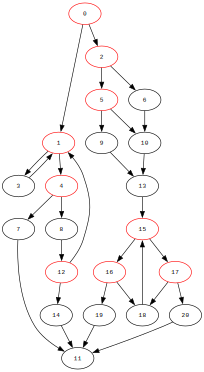

In [10]:
# GRAPH THE DREAM CFG, HIGHLIGHTING CONDITIONAL NODES

func = bv.get_functions_by_name('_dream_cfg')[0]

G = bn2nx(func)
#G[a,b]
bb = func.llil.basic_blocks[0]
reds = [bb for bb in func.llil.basic_blocks if bb[-1].operation == LowLevelILOperation.LLIL_IF]
draw_basic_blocks_min(func.llil, reds)

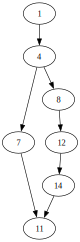

In [11]:
llil = func.llil
G = cfg_slice(llil, llil.basic_blocks[1], llil.basic_blocks[11])
draw_networkx(G)

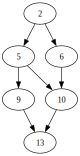

In [12]:
G = cfg_slice(llil, llil.basic_blocks[2], llil.basic_blocks[13])
draw_networkx(G)